In [1]:
import numpy as np

class KalmanFilter3D:
    def __init__(self, percent_var=0.05, gain=0.8):
        self.percent_var = percent_var
        self.gain = gain

    def filter(self, stack):
        """
        Applies the Kalman Filter to a 3D grayscale image stack.

        Args:
            stack (np.ndarray): The input image stack, shape (stack_size, height, width).

        Returns:
            np.ndarray: The filtered image stack, shape (stack_size, height, width).
        """

        stack_size, height, width = stack.shape
        dimension = height * width

        predicted = stack[0].flatten()
        predicted_var = np.ones(dimension) * self.percent_var
        observed = np.empty_like(predicted)
        kalman_gain = np.empty_like(predicted)
        corrected = np.empty_like(predicted)
        corrected_var = np.empty_like(predicted)

        for i in range(1, stack_size):
            observed[:] = stack[i].flatten()

            kalman_gain[:] = predicted_var / (predicted_var + self.percent_var)
            corrected[:] = self.gain * predicted + (1.0 - self.gain) * observed + \
                kalman_gain * (observed - predicted)
            corrected_var[:] = predicted_var * (1.0 - kalman_gain)

            predicted = corrected
            predicted_var = corrected_var

            stack[i] = corrected.reshape(height, width)

        return stack

In [2]:
import tifffile

def read_tif_stack(filename):
    """Reads a .tif image stack into a 3D NumPy array.

    Args:
        filename: The path to the .tif file.

    Returns:
        A 3D NumPy array containing the image stack.
    """

    with tifffile.TiffFile(filename) as tif:
        return tif.asarray()

In [3]:
import os
import numpy as np

root = "C:\\Users\\svw191\\PythonFiles\\PythonTrial\\LED +APs 240926\\240926_pl100_pc001_LED+APs500microW_ex01\\DATA\\ChanB"
filename = "ChanB_stk.tif"
# stack = read_tif_stack(os.path.join(root,filename))

tif_stk = read_tif_stack(os.path.join(root, filename))
print(np.shape(tif_stk))

(2950, 512, 512)


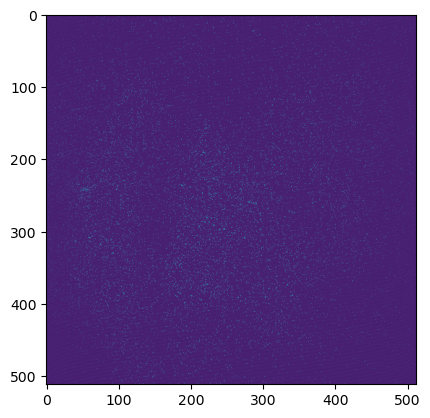

In [4]:
import matplotlib.pyplot as plt

plt.imshow(tif_stk[1000,:,:])

In [5]:
import time

# Example usage:
# Assuming you have a 3D grayscale image stack loaded into a NumPy array 'stack'

raw_tif_stk = np.copy(tif_stk) # saves for comparison

start_time = time.time()

filtered_stack = KalmanFilter3D().filter(tif_stk)

end_time = time.time()

elapsed_time = end_time - start_time
print("Elapsed time:", elapsed_time, "seconds")

Elapsed time: 20.096615076065063 seconds


In [6]:
print(np.shape(filtered_stack))

(2950, 512, 512)


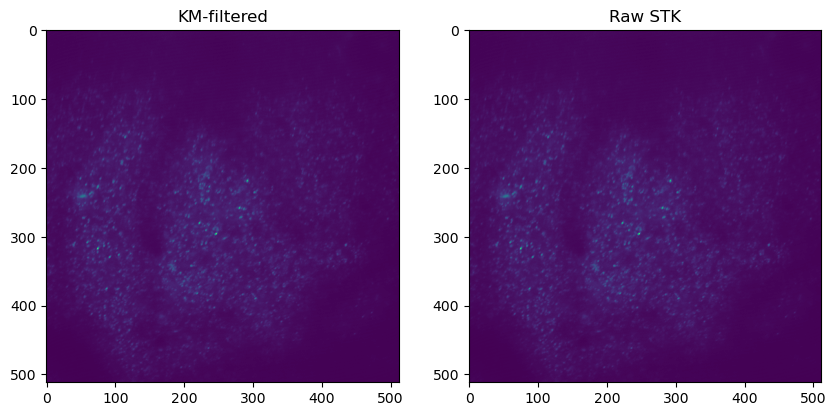

In [7]:
# check out the array
import matplotlib.pyplot as plt

# Create a figure and subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Display the first array in the first subplot
axes[0].imshow(np.mean(filtered_stack, axis=0))
axes[0].set_title('KM-filtered')

# Display the second array in the second subplot
axes[1].imshow(np.mean(raw_tif_stk, axis=0))
axes[1].set_title('Raw STK')

plt.show()


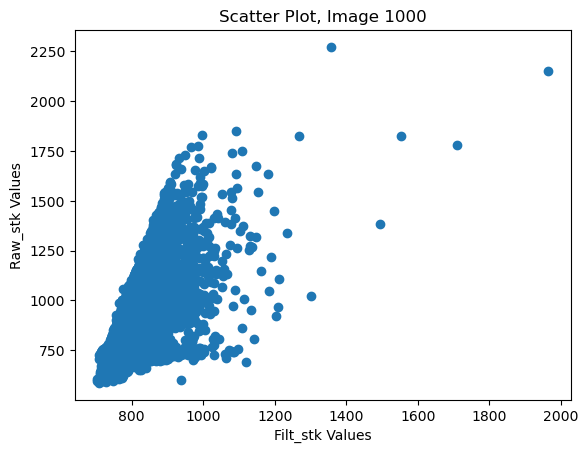

In [12]:
plt.scatter(filtered_stack[1000,:,:],raw_tif_stk[1000,:,:])
plt.xlabel('Filt_stk Values')
plt.ylabel('Raw_stk Values')
plt.title('Scatter Plot, Image 1000')
plt.show()

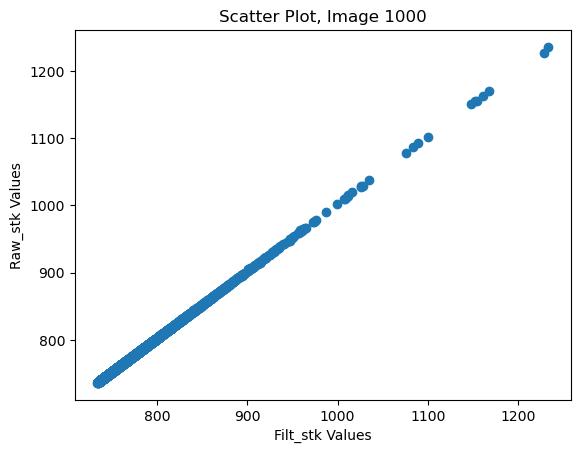

In [15]:
plt.scatter(np.mean(filtered_stack[1000:2010,:,:], axis=0),np.mean(raw_tif_stk[1000:2010,:,:], axis=0))
plt.xlabel('Filt_stk Values')
plt.ylabel('Raw_stk Values')
plt.title('Scatter Plot, Image 1000')
plt.show()

In [ ]:
# check out the array
import matplotlib.pyplot as plt

# Create a figure and subplots
fig, ax2 = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Display the first array in the first subplot
ax2[0].imshow(filtered_stack[1000,:,:])
ax2[0].set_title('KM-filtered, image 1000')

# Display the second array in the second subplot
ax2[1].imshow(raw_tif_stk[1000,:,:])
ax2[1].set_title('Raw STK, image 1000')

plt.show()
